In [1]:
from shfl.data_base.emnist import Emnist

database = Emnist()
train_data, train_labels, val_data, val_labels, test_data, test_labels = database.load_data()
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(type(train_data[0]))
train_data[0].shape

199999
40000
40000
<class 'numpy.ndarray'>


(28, 28)

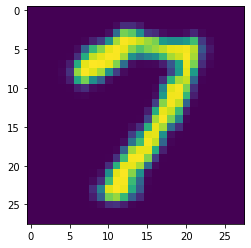

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

# I.I.D. Federated Sampling

In the IID scenario, each node has independent and identically distributed access to all observations in the dataset.

The only available two choices are:
1. Number of instances per node.
2. Sampling with or without replacement.

## Number of instances per node in a i.i.d scenario

The *weight* parameter indicates the deterministic distribution of the number of samples per node, as a ratio over the total number of observations in the dataset. For instance, *weights = [0.2, 0.3, 0.5]* means that the first node will be assigned a 20% of the total number of observations in the dataset, the second node a 30% and the third node a 50%. 

Note that the *weight* parameter must not necessarily sum up to one. For instance, *weights = [0.2, 0.3, 0.1]* means that the first node will be assigned a 20% of the total number of observations in the dataset, the second node a 30% and the third node a 10%. 

## Sampling with or without replacement

The *sampling* parameter, which can have one of the following two values *'with_replacement'* or *'without_replacement'*, indicates if an observation assigned to a particular node is removed from the dataset pool and thereof, it will be assigned only once (*weight = 'with_replacement'*); or will be back to the dataset pool and thereof, it could be selected for a new asignation (*weight = 'without_replacement'*).

## Combinations of the *weights* and *sampling* parameters

### *sampling = 'without_replacement'* 

When *sampling = 'without_replacement'* the total number of samples assigned to the nodes **can not be** greater than the number of available observations in the dataset. This imposes the constraint on the *weights* parameter than the sum of the *weights* values should be equal or lesser than one. The possible cases are:

1. If the sum of the *weights* values is lesser than one when *sampling = 'without_replacement'* then, the resulting distribution of observations to the nodes (the union of the nodes sets of samples) is a subset of the raw dataset, such that the nodes do not share any observation among them.

In [4]:
from shfl.data_distribution.data_distribution_iid import IidDataDistribution

iid_distribution = IidDataDistribution(database)
federated_data, test_data, test_label = iid_distribution.get_federated_data("iid_data" ,100)

print(type(federated_data))
print(federated_data.num_nodes())

<class 'shfl.core.federated_operation.FederatedData'>
100


2. If the sum of the *weights* values is equal to one when *sampling = 'without_replacement'* then, the resulting distribution of observations to the nodes (the union of the nodes sets of samples) is eaxactly the raw dataset, that is, the distributed samples conform a partition of the original dataset.
3. If the sum of the *weights* values is greater than one when *sampling = 'without_replacement'* then, the *weights* values will be normalized to sum up to one (Case 2). For instance, giving *sampling = 'without_replacement'* and *weights = [0.2, 0.3, 0.7]* the sum of the *weights* values is 1.2 > 1, and thereof, the effective *weights* values will result of the normalization: *weights = [0.2/1.2, 0.3/1.2, 0.7/1.2]*.

### *sampling = 'with_replacement'* 

When *sampling = 'with_replacement'* the total number of samples assigned to the nodes **can be** greater than the number of available observations in the dataset. This removes any constraint on the *weights* parameter values. The resulting distribution of samples across the nodes are subsets of the original dataset that could share observations and also, each node could have none, one or more than one samples of a given observation.

In [6]:
from shfl.data_distribution.data_distribution_non_iid import NonIidDataDistribution

non_iid_distribution = NonIidDataDistribution(database)
federated_data, test_data_non_iid, test_label_non_iid = non_iid_distribution.get_federated_data("non-iid-data", 10)

print(type(federated_data))
print(federated_data.num_nodes())

[[1, 3, 0], [5, 9, 7, 6], [3, 4, 2, 0], [3, 0, 8, 9, 7, 6, 2, 1], [1, 3, 6, 2], [7, 3, 0, 8, 1, 9, 4, 2, 5], [3, 2, 0, 9], [9, 3, 4, 5, 7, 8, 6], [6, 7, 9, 3, 0, 5], [3, 4, 6]]
<class 'shfl.core.federated_operation.FederatedData'>
10


weights = np.random.dirichlet(np.ones(10),size=1)

In [10]:
import numpy as np

weights = np.random.dirichlet(np.ones(10))
np.sum(weights)
print (weights)

[0.06889571 0.14359928 0.03105386 0.07022899 0.15082644 0.00484538
 0.16163903 0.17182891 0.09091448 0.10616791]


In [13]:
federated_data, test_data, test_label = iid_distribution.get_federated_data("weighted-iid-data", 10, weights=weights)

In [15]:
federated_data_non_iid, test_data_non_iid, test_label_non_iid = non_iid_distribution.get_federated_data("weighted-non-iid-data", 10, weights=weights)

[[8, 9, 4, 0], [7, 4, 6, 3, 1, 8, 0, 9, 2], [0, 7, 5, 3, 9, 4, 2, 8, 1], [8, 4, 7, 2], [7, 4, 6, 3], [8, 5, 9, 4, 2, 6], [3, 2, 1, 6, 7, 8, 0], [3, 5, 2], [2, 9, 3, 6, 5, 1, 7, 4, 0, 8], [4, 2, 6, 5, 3, 1, 9, 7, 0]]
